Engy-5050 Spring 2025 UMass Lowell; Prof. V. F. de Almeida **26Apr2025**

# 08. Bare Fuel Slab Criticality
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Dmtrx}{\boldsymbol{\mathsf{D}}}
  \newcommand{\Gmtrx}{\boldsymbol{\mathsf{G}}}
  \newcommand{\Hmtrx}{\boldsymbol{\mathsf{H}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\Ecal}{\mathscr{E}}
  \newcommand{\Lcal}{\mathscr{L}}
  \newcommand{\Dcal}{\mathscr{D}}
$


## Table of Contents<a id="toc"></a>
* [Objectives](#obj)
1. [Poisson Problem with Symmetry/Dirichlet Boundary Conditions](#poisson-1)
1. [Associated Eigenvalue Problem](#eigen-1)
1. [Rayleigh-Ritz or Galerkin's Method w/ Finite Element Basis Functions](#fem-1)
   + [Data](#data-1)
   + [Finite Element Lagrange Basis Functions](#fembf-1)
   + [Results](#results-1)
   + [Criticality](#criticality-1)
     - [Data](#datac-1)
     - [Results](#resultsc-1)
1. [Poisson Problem with Symmetry/Robin Boundary Conditions](#poisson-2)
1. [Associated Eigenvalue Problem](#eigen-2)
1. [Rayleigh-Ritz or Galerkin's Method w/ Finite Element Basis Functions](#fem-2)
   + [Data](#data-2)
   + [Finite Element Lagrange Basis Functions](#fembf-2)
   + [Results](#results-2)
   + [Criticality](#criticality-2)
     - [Data](#datac-2)
     - [Results](#resultsc-2)

## [Objectives](#toc)<a id="obj"></a>

 + Solve the 1-D cartesian coordinates, neutron diffusion criticality problem in a bare slab.
 + Demonstrate variation with respect to boundary conditions
 + Demonstrate that a realistic critical case problem will require iterations for the solution

## [Poisson Problem with Symmetry/Dirichlet Boundary Conditions](#toc)<a id="poisson-1"></a>

Solve the spatial neutron flux intensity criticality (steady state) problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)' + \bigl(\nu\Sigma_f - \Sigma_a\bigr)\,u &= 0 \quad\text{in}\quad ]a,b[, \\
 u'(a) &= 0, \\
 u(b) &= 0.
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, and macroscopic absorption cross section, $\Sigma_a$.

The question of whether the spatial neutron flux magnitude will remain in a non-trivial steady state is deeply involved with the solution of the above problem. Consider the case where the neutron spatial flux magnitude is sustained by a distributed fission source and somewhere at the boundary of the domain the spatial flux magnitude **vanishes**. In other words, how can a neutron population density be contained in a finite region of space (to be called a reactor)? The above mathematical problem reflects the physical description just outlined (NB: a non-homogeneous Dirichlet boundary condition would not apply to the physical system described since it would effectively add a non-fission, constant source of neutrons and criticality is no longer an issue).

Since the operator above $\Dcal(\cdot) := -\bigl(-D\, u'\bigr)' (\cdot) + \bigl(\nu\Sigma_f - \Sigma_a\bigr) (\cdot)$ is almost always symmetric positive-definite, the only solution of the problem is the trivial one $u\equiv 0$. However if the operator can be made singular either via a modification of the parameters, $\nu$, $\Sigma_f$, and $\Sigma_a$, or by pure coincidence of the choice of the parameters, there will be an infinite number of non-zero solutions. The following modification of the above problem systematically calculates the specific choice of parameters that lead to a non-zero distribution of neutrons in the domain.

## [Eigenvalue Problem Statement](#toc)<a id="eigen-1"></a>

Introducing the factor $k$ (neutron multiplication factor), the Poisson operator $\Dcal$ can be made singular, therefore non-zero solutions can be obtained from solving the neutron flux intensity criticality problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ and $k \in \Reals$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)' + \bigl(k^{-1}\nu\Sigma_f - \Sigma_a\bigr)\,u &= 0 \quad\text{in}\quad ]a,b[, \\
 u'(a) &= 0, \\
 u(b) &= 0.
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, and macroscopic absorption cross section, $\Sigma_a$.

## [Rayleigh-Ritz or Galerkin Finite Element Method](#toc)<a id="fem-1"></a>

The Rayleigh-Ritz method for computing an approximate solution to the above mentioned Poisson problem is: find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(b) = 0, (u'_N,u'_N) + (u_N,u_N) < \infty \bigr\}$ and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$. The Poisson energy norm is defined as $\norm{v}_{\Ecal} := (\Dcal v,v) = (v, \Dcal v)$, where $\Dcal$ is the differential operator defined by $\Dcal(\cdot) := -\bigl(-D\, u'\bigr)'(\cdot) + \bigl(k^{-1}\nu\Sigma_f - \Sigma_a\bigr)(\cdot)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} - \lambda\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i)$
  
and $\lambda = k^{-1}\nu\Sigma_f - \Sigma_a$ or $k = \frac{\nu\Sigma_f}{\lambda + \Sigma_a}$.
  
This formulation only accommodates basis functions that satisfy the homogeneous boundary conditions. The problem is referred to as a *generalized eigenvalue problem*.

### [Data](#toc)<a id="data-1"></a>

Solve problem with parameter values:

> + a = 0 cm
> + b = 10.0 cm
> + D = 1.44 cm
> + $\Sigma_f$ = 0.1 cm^-1
> + $\Sigma_a$ = $1.20\,\Sigma_f$
> + $\nu$ = 2.4355

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter

In [2]:
'''Domain'''
x_a = 0
x_b = 10*unit.cm

In [3]:
'''Parameters and data'''
diffusion_coeff_fuel = 1.44*unit.cm
sigma_f_fuel = 0.1/unit.cm
sigma_a_fuel = sigma_f_fuel * 1.20 #20% increase from fission
nu = 2.4355 # average # of neutrons per fission
# sanity check
assert sigma_a_fuel >= sigma_f_fuel

In [4]:
'''Somewhat realistic parameters for UO2 5% enrichment'''
# These values will never lead to criticality without a reflector
#diffusion_coeff_fuel = 0.86*unit.cm
#sigma_f_fuel = 0.04/unit.cm
#sigma_gamma_fuel = 0.1/unit.cm
#sigma_a_fuel = sigma_f_fuel + sigma_gamma_fuel #5% increase from fission
#nu = 2.4355 # average # of neutrons per fission
# sanity check
#assert sigma_a_fuel >= sigma_f_fuel

'Somewhat realistic parameters for UO2 5% enrichment'

### [Finite Element Basis Functions](#toc)<a id="fembf-1"></a>

Specify basis functions distribution on the material domain and degree.

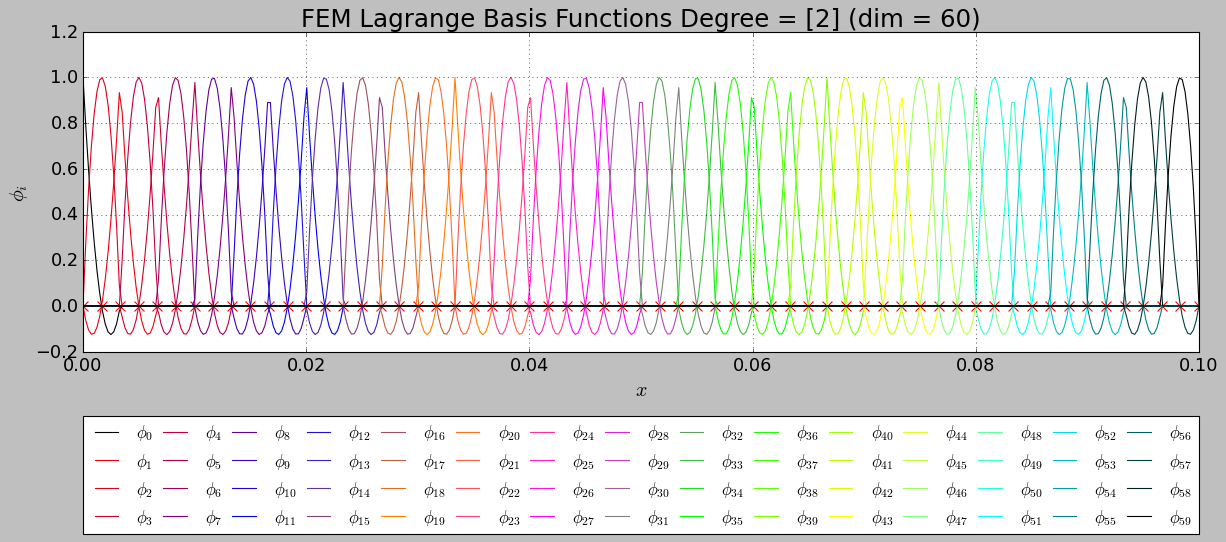

In [5]:
'''Build the basis functions'''

from pyfem1d.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [30] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b], bc_x_max='dirichlet')
femlb.plot(n_plot_pts=400, n_legend_cols=15)

  + $A_{i,j} = D\,(\phi'_j,\phi'_i) - \lambda\,(\phi_j,\phi_i)$

In [6]:
'''Build the matrix of coefficients of the linear system'''

d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'")
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v')

In [7]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(d_mtrx) == d_mtrx.shape[1]:
    print('D is full rank.')
else:
    print('D is rank deficient.')

if matrix_rank(g_mtrx) == g_mtrx.shape[1]:
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is full rank.
G is full rank.


In [8]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx) # this solves D x = lambda G x

In [9]:
import numpy as np
np.set_printoptions(precision=5)
print('lambda [cm^-1] = ', lambda_vec[:5]*unit.cm)
print('Buckling (material) = ', np.sqrt(lambda_vec[:5]/diffusion_coeff_fuel))

lambda [cm^-1] =  [0.03553 0.31978 0.88827 1.74104 2.87817]
Buckling (material) =  [ 15.70796  47.12391  78.54007 109.95711 141.37646]


In [10]:
'''Eigenvalues'''
import numpy as np
k_vec = nu*sigma_f_fuel/(lambda_vec+sigma_a_fuel)
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.56593 0.55381 0.24155 0.13087 0.08123]


In [11]:
'''Double checking operator singularity (only first 5 eigenvalues)'''
for k in k_vec[:5]:
    l_mtrx = d_mtrx - (nu*sigma_f_fuel/k - sigma_a_fuel)*g_mtrx
    if np.linalg.matrix_rank(l_mtrx) != l_mtrx.shape[1]:
        print('Singular matrix')

Singular matrix
Singular matrix
Singular matrix
Singular matrix
Singular matrix


In [12]:
'''Probability of non-leakage'''
p_nl = sigma_a_fuel / (lambda_vec[0] + sigma_a_fuel)
print('P_NL = ', p_nl)

P_NL =  0.7715524684631968


In [13]:
'''k_oo'''
k_oo = k_vec[0]/p_nl
print('k_oo = ', k_oo)

k_oo =  2.0295833333333335


### [Results](#toc)<a id="results-1"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [14]:
'''Build the best approximation function in V_N'''

def u_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    return u_0

In [15]:
'''Build the derivative '''

def u_prime_star(x, c_star_vec):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_0

In [16]:
'''Build the best approximation function in V_N'''

def u_flux_x(x, c_star_vec):
    return -diffusion_coeff_fuel*u_prime_star(x, c_star_vec)

In [17]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(x_a, x_b, 20)

# Normalized eigenvector
c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])

# Note that u values are only determined up to a multiplying factor
u_values = u_star(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_norm_factor = u_values[normalizing_val[0]]
u_values /= u_values[normalizing_val[0]]

flux_values = u_flux_x(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_norm_factor = flux_values[normalizing_val[0]]
flux_values /= flux_norm_factor

print('k = %2.5e'%k_vec[0])
print('')

print("   x [cm]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.cm), '       %3.5f'%t, '      %3.5f'%q)
    
print('u normalization value [#/cm^2-s] = %2.8e'%(u_norm_factor*unit.cm**2))
print('q normalization value [#/cm^2-s] = %2.8e'%(flux_norm_factor*unit.cm**2))

k = 1.56593e+00

   x [cm]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        1.00000       0.00000
 2)  0.53        0.99658       0.08255
 3)  1.05        0.98636       0.16457
 4)  1.58        0.96940       0.24542
 5)  2.11        0.94582       0.32460
 6)  2.63        0.91577       0.40164
 7)  3.16        0.87947       0.47578
 8)  3.68        0.83717       0.54691
 9)  4.21        0.78914       0.61402
10)  4.74        0.73572       0.67713
11)  5.26        0.67728       0.73556
12)  5.79        0.61421       0.78889
13)  6.32        0.54695       0.83711
14)  6.84        0.47595       0.87917
15)  7.37        0.40169       0.91566
16)  7.89        0.32470       0.94554
17)  8.42        0.24548       0.96914
18)  8.95        0.16460       0.98618
19)  9.47        0.08258       0.99625
20)  10.00        0.00000       1.00000
u normalization value [#/cm^2-s] = 1.81071492e-05
q normalization value [#/cm^2-s] = 4.09667614e-06


In [18]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', u_star(x_a, c_star_vec), ' u_N(b) = ', u_star(x_b, c_star_vec))

u_N(a) =  [0.18107]  u_N(b) =  [0.]


In [19]:
left_flux = (u_flux_x(x_a, c_star_vec)[0], 0.0)
normal = np.array((-1,0))

left_normal_flux = np.dot(np.array(left_flux), normal)
print('left normal diff. flux =', left_normal_flux)

left normal diff. flux = -1.9594206966075945e-07


In [20]:
right_flux = (u_flux_x(x_b, c_star_vec)[0], 0.0)
normal = np.array((1,0))

right_normal_flux = np.dot(np.array(right_flux), normal)
print('right normal diff. flux =', right_normal_flux)

right normal diff. flux = 0.04096676135881741


In [21]:
'''Total power (integrated source)'''
from scipy.integrate import quad
source = lambda x: lambda_vec[0] * u_star(x, c_star_vec)
(total_power, _) = quad(source, x_a, x_b)
print('integrated source [#/(cm^2 s) =', total_power)

integrated source [#/(cm^2 s) = 0.040957406228826466


In [22]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%((left_normal_flux + right_normal_flux - total_power)/total_power*100))

Total flux balance relative error [%] = 0.02 


In [23]:
'''Plot neutron flux modes'''
from pyfem1d.toolkit import color_map

def plot_modes(k_vec, eigen_vec):

    k_vec = k_vec.round(5)
    n_pts = 300
    x = np.linspace(x_a, x_b, n_pts)
    
    
    import matplotlib.pyplot as plt
    plt.style.use('classic')
    (fig, ax1) = plt.subplots(1, figsize=(14, 5))
    ax2 = ax1.twinx()
    
    colors = color_map(k_vec.shape[0])

    for j,k in enumerate(k_vec):
        c_star_vec = eigen_vec[:,j]/scipy.linalg.norm(eigen_vec[:,j])
        
        u_values = u_star(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
        u_values /= u_values[normalizing_val[0]]

        u_flux_x_values = u_flux_x(x, c_star_vec)
        (normalizing_val, ) = np.where(np.abs(u_flux_x_values) == np.abs(u_flux_x_values).max())
        u_flux_x_values /= u_flux_x_values[normalizing_val[0]]

        ax1.plot(x/unit.cm, u_values, '-', label=r'Solution $k$=%2.2f'%k, color=colors[j])
        
        ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
        ax1.set_ylabel(r'$u_N$ [a.u.]', fontsize=18, color='black')
        ax1.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax1.tick_params(axis='x', labelsize=16)
        ax1.legend(loc='upper left', fontsize=12)
        ax1.grid(True)
        
        ax2.plot(x/unit.cm, u_flux_x_values,'--', color=colors[j], label='Flux $k$=%2.2f'%k)

        ax2.set_ylabel(r"$-D\,u'_N$ [a.u.]", fontsize=16, color='black')
        ax2.tick_params(axis='y', labelcolor='black', labelsize=16)
        ax2.legend(loc='upper right', fontsize=12)
        
    plt.title(r'Bare Fuel Slab Modes ($k$=%s # elem=%s, N=%i)'%(k_vec,n_elem,len(femlb.basis_func_list)), fontsize=20)
    plt.show()

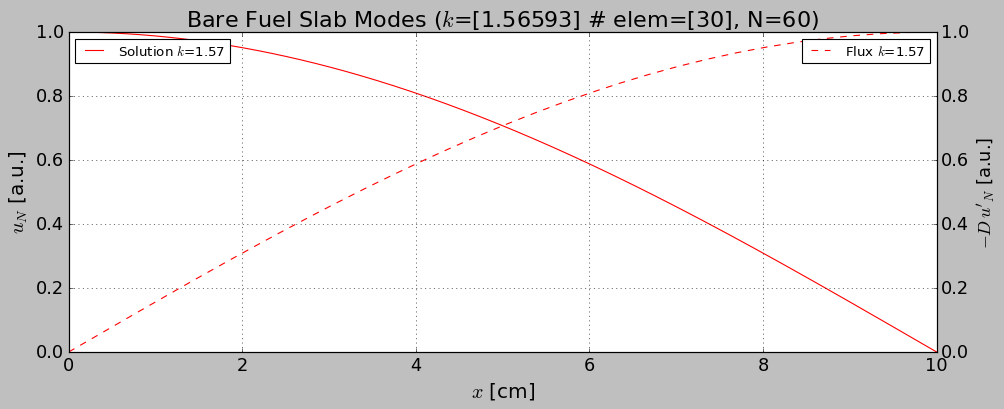

In [24]:
plot_modes(k_vec[0:1], eigen_vec[:,0:1])

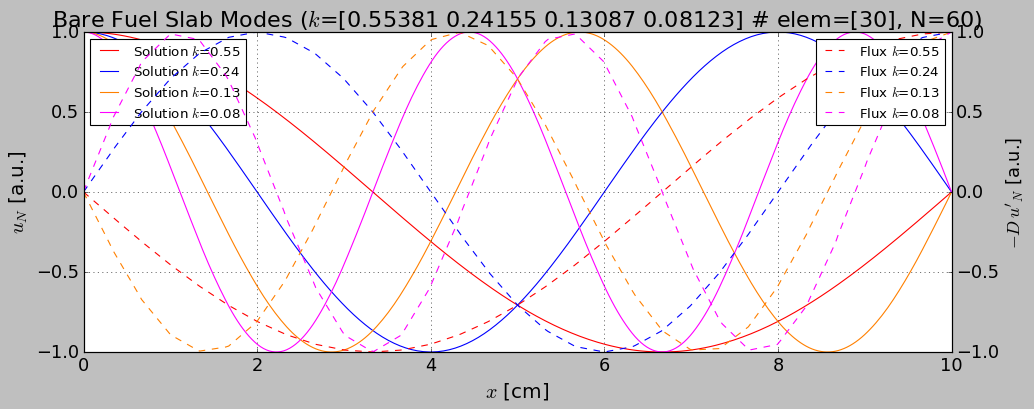

In [25]:
plot_modes(k_vec[1:5], eigen_vec[:,1:5])

In [26]:
'''Sigma_f critical'''
sigma_f_fuel_critical = sigma_f_fuel / k_vec[0]
print('Sigma_f critical = %2.4e [1/cm]'%(sigma_f_fuel_critical*unit.cm))

Sigma_f critical = 6.3860e-02 [1/cm]


### [Criticality](#toc)<a id="criticality-1"></a>
Use the adjusted $\Sigma_{fc}$ to verify the solution is critical.

#### [Data](#toc)<a id="datac-1"></a>

Solve problem with the modified parameter:

> + $\Sigma_{fc}$

*Assume all other parameters to remain the same.* This assumption is unlikely to hold because $D$ will likely change and an iterative process must be used even for this simple problem.


In [27]:
'''Build the matrix of coefficients of the linear system'''
# Note that the eigenvalue problem is the same as previously stated if D does not change
#diffusion_coeff_fuel *= 0.95
#d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'")
#g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v')

'Build the matrix of coefficients of the linear system'

In [28]:
'''Compute optimal coefficient eigenvectors'''
# Same solution as before
#import scipy
#lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx, g_mtrx)

'Compute optimal coefficient eigenvectors'

#### [Results](#toc)<a id="resultsc-1"></a>

Multiplication factor of the critical solution.

In [29]:
'''Compute the new multiplication factor'''
k_vec = nu*sigma_f_fuel_critical/(lambda_vec+sigma_a_fuel)

In [30]:
'''Eigenvalues'''
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.      0.35366 0.15425 0.08357 0.05188]


## [Poisson Problem with Symmetry/Robin Boundary Conditions](#toc)<a id="poisson-2"></a>

Solve the spatial neutron flux intensity criticality (steady state) problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + \bigl(\nu\Sigma_f - \Sigma_a\bigr)\,u(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u'(a) &= 0, \\
 -D\,u'(b) &= \frac{D}{\delta}\,u(b).
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, and macroscopic absorption cross section, $\Sigma_a$.

This problem is analogous to the previous one with Dirichlet boundary condition. That is, if the operator $\Lcal(\cdot)$ is non-singular, there exists only the trivial solution.

## [Eigenvalue Problem Statement](#toc)<a id="eigen-2"></a>

Introducing the factor $k$ (neutron multiplication factor), the Poisson operator $\Dcal$ can be made singular, therefore non-zero solutions can be obtained from solving the neutron flux intensity criticality problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ and $k \in \Reals$ such that:

\begin{align*}
 -\bigl(-D\, u'\bigr)'(x) + \bigl(\frac{1}{k}\nu\Sigma_f - \Sigma_a\bigr)\,u(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u'(a) &= 0, \\
 q_n(b) &= \frac{D}{\delta}\,u(b).
\end{align*}
   
Given data: diffusion coefficient, $D$, macroscopic fission cross section, $\Sigma_f$, average number of neutrons per fission, $\nu$, neutron multiplication factor, $k$, macroscopic absorption cross section, $\Sigma_a$, and the extrapolation distance, $\delta$, in the $x$ direction.

## [Rayleigh-Ritz or Galerkin Finite Element Method](#toc)<a id="fem-2"></a>

The Rayleigh-Ritz method for computing an approximate solution to the above mentioned Poisson problem is: find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid (u'_N,u'_N) + (u_N,u_N) < \infty \bigr\}$
and $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
  \overset{(N\times N)}{\Amtrx} \,\overset{(N\times 1)}{\cvec^*}  = 
  \biggl(\overset{(N\times N)}{\Dmtrx} + \frac{D}{\delta}\,\overset{(N\times N)}{\Hmtrx} - \lambda\,\overset{(N\times N)}{\Gmtrx}\biggr)\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\zerovec ,
\end{equation*}

where:
  + $A_{i,j} = D\,(\phi'_j,\phi'_i) + \frac{D}{\delta}\phi_j(b)\,\phi_i(b) - \lambda\,(\phi_j,\phi_i) $
  
and $\lambda = \frac{1}{k}\nu\Sigma_f - \Sigma_a$ or $k = \frac{\nu\Sigma_f}{\lambda + \Sigma_a}$.
  
This formulation naturally accommodates the Robin boundary condition into the eigenvalue problem.

### [Data](#toc)<a id="data-2"></a>

Solve problem with the same parameters as before and:

> + $\delta$ = 1 cm

In [31]:
'''Parameters and data'''

delta = 1*unit.cm
delta = 2*diffusion_coeff_fuel  # vacuum BC

### [Finite Element Basis Functions](#toc)<a id="fembf-2"></a>

Specify basis functions distribution on the material domain and degree.

In [32]:
'''Build the basis functions'''

from pyfem1d.toolkit import LagrangeFEMBasis 

degree = 2
n_elem = [30] 

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b])
#femlb.plot(n_plot_pts=400)

  + $A_{i,j} = D\,(\phi'_j,\phi'_i) + \frac{D}{\delta}\phi_j(b)\,\phi_i(b) - \lambda\,(\phi_j,\phi_i)$

In [33]:
d_mtrx = femlb.inner_product_matrix(lambda x: diffusion_coeff_fuel, "u'", "v'")
h_mtrx = femlb.boundary_inner_product_matrix('right', lambda x: diffusion_coeff_fuel/delta, 'u', 'v')
g_mtrx = femlb.inner_product_matrix(lambda x:1.0, 'u', 'v')

In [34]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'

import numpy as np

if matrix_rank(d_mtrx) == d_mtrx.shape[1]:
    print('D is full rank.')
else:
    print('D is rank deficient.')
    
if matrix_rank(h_mtrx) == h_mtrx.shape[1]:
    print('H is full rank.')
else:
    print('H is rank deficient.')

if np.linalg.matrix_rank(d_mtrx+h_mtrx) == d_mtrx.shape[1]:
    print('D+H is full rank.')
else:
    print('D+H is rank deficient.')
    
if np.linalg.matrix_rank(g_mtrx) == g_mtrx.shape[1]:
    print('G is full rank.')
else:
    print('G is rank deficient.')

D is rank deficient.
H is rank deficient.
D+H is full rank.
G is full rank.


In [35]:
'''Compute optimal coefficient eigenvectors'''
import scipy
lambda_vec, eigen_vec = scipy.linalg.eigh(d_mtrx+h_mtrx, g_mtrx) # Ax=lambda Bx (A and B must be full rank)

In [36]:
import numpy as np
np.set_printoptions(precision=5)
print('lambda [cm^-1] = ', lambda_vec[:5]*unit.cm)
print('Buckling (material) = ', np.sqrt(lambda_vec[:5]/diffusion_coeff_fuel))

lambda [cm^-1] =  [0.0218  0.21595 0.65762 1.37352 2.37072]
Buckling (material) =  [ 12.30278  38.72541  67.57829  97.6644  128.30943]


In [37]:
'''Eigenvalues'''
k_vec = nu*sigma_f_fuel/(lambda_vec+sigma_a_fuel)
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.71761 0.72496 0.3132  0.16307 0.09778]


In [38]:
'''Probability of non-leakage'''
p_nl = sigma_a_fuel / (lambda_vec[0] + sigma_a_fuel)
print('P_NL = ', p_nl)

P_NL =  0.8462885315606892


In [39]:
'''k_oo'''
k_oo = k_vec[0]/p_nl
print('k_oo = ', k_oo)

k_oo =  2.029583333333334


In [40]:
'''Double checking operator singularity (only first 5 eigenvalues)'''
for eigenval in lambda_vec[:5]:
    a_mtrx = d_mtrx + h_mtrx - eigenval * g_mtrx
    if np.linalg.matrix_rank(a_mtrx) != a_mtrx.shape[1]:
        print('Singular matrix')

Singular matrix
Singular matrix
Singular matrix
Singular matrix
Singular matrix


### [Results](#toc)<a id="results-2"></a>

Much can be exercised in terms of results by varying the parameters of the problem.

In [41]:
'''Table of results for the fundamental mode'''

x_table = np.linspace(x_a, x_b, 20)

# Normalized eigenvector
c_star_vec = eigen_vec[:,0]/scipy.linalg.norm(eigen_vec[:,0])

# Note that u values are only determined up to a multiplying factor
u_values = u_star(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(u_values) == np.abs(u_values).max())
u_norm_factor = u_values[normalizing_val[0]]
u_values /= u_values[normalizing_val[0]]

flux_values = u_flux_x(x_table, c_star_vec)

(normalizing_val, ) = np.where(np.abs(flux_values) == np.abs(flux_values).max())
flux_norm_factor = flux_values[normalizing_val[0]]
flux_values /= flux_norm_factor

print('k = %2.5e'%k_vec[0])
print('')

print("   x [cm]        u [a.u.]      -D u'_x [a.u.]")
for i,(x,t,q)in enumerate(zip(x_table, u_values, flux_values)):
    print('%2i)'%(i+1), ' %2.2f'%(x/unit.cm), '       %3.5f'%t, '      %3.5f'%q)
    
print('u normalization value [#/cm^2-s] = %2.8e'%(u_norm_factor*unit.cm**2))
print('q normalization value [#/cm^2-s] = %2.8e'%(flux_norm_factor*unit.cm**2))

k = 1.71761e+00

   x [cm]        u [a.u.]      -D u'_x [a.u.]
 1)  0.00        1.00000       0.00000
 2)  0.53        0.99790       0.06863
 3)  1.05        0.99163       0.13699
 4)  1.58        0.98119       0.20476
 5)  2.11        0.96664       0.27167
 6)  2.63        0.94805       0.33748
 7)  3.16        0.92547       0.40180
 8)  3.68        0.89902       0.46456
 9)  4.21        0.86881       0.52521
10)  4.74        0.83494       0.58378
11)  5.26        0.79759       0.63986
12)  5.79        0.75688       0.69323
13)  6.32        0.71301       0.74384
14)  6.84        0.66614       0.79109
15)  7.37        0.61649       0.83526
16)  7.89        0.56425       0.87574
17)  8.42        0.50965       0.91265
18)  8.95        0.45291       0.94576
19)  9.47        0.39427       0.97478
20)  10.00        0.33398       1.00000
u normalization value [#/cm^2-s] = -1.61730610e-05
q normalization value [#/cm^2-s] = -2.70108035e-06


In [42]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u_N(a) = ', u_star(x_a, c_star_vec), ' u_N(b) = ', u_star(x_b, c_star_vec))

u_N(a) =  [-0.16173]  u_N(b) =  [-0.05401]


In [43]:
left_flux = (u_flux_x(x_a, c_star_vec)[0], 0.0)
normal = np.array((-1,0))

left_normal_flux = np.dot(np.array(left_flux), normal)
print('left normal diff. flux =', left_normal_flux)

left normal diff. flux = 6.586188557093919e-08


In [44]:
right_flux = (u_flux_x(x_b, c_star_vec)[0], 0.0)
normal = np.array((1,0))

right_normal_flux = np.dot(np.array(right_flux), normal)
print('right normal diff. flux =', right_normal_flux)

right normal diff. flux = -0.027010803524881635


In [45]:
'''Total power (integrated source)'''
from scipy.integrate import quad
source = lambda x: lambda_vec[0] * u_star(x, c_star_vec)
(total_power, _) = quad(source, x_a, x_b)
print('integrated source =', total_power)

integrated source = -0.02700704112466671


In [46]:
'''Total flux balance'''

print('Total flux balance relative error [%%] = %2.2f '%(100*(left_normal_flux + right_normal_flux - total_power)/total_power))

Total flux balance relative error [%] = 0.01 


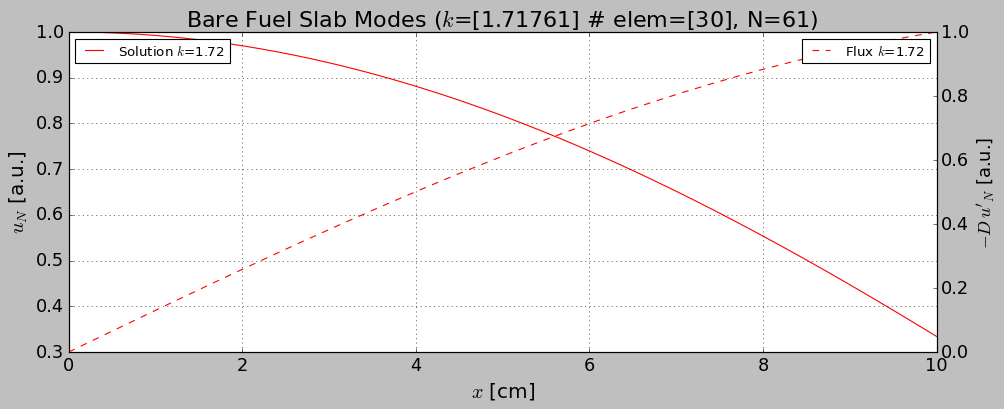

In [47]:
plot_modes(k_vec[0:1], np.abs(eigen_vec[:,0:1]))

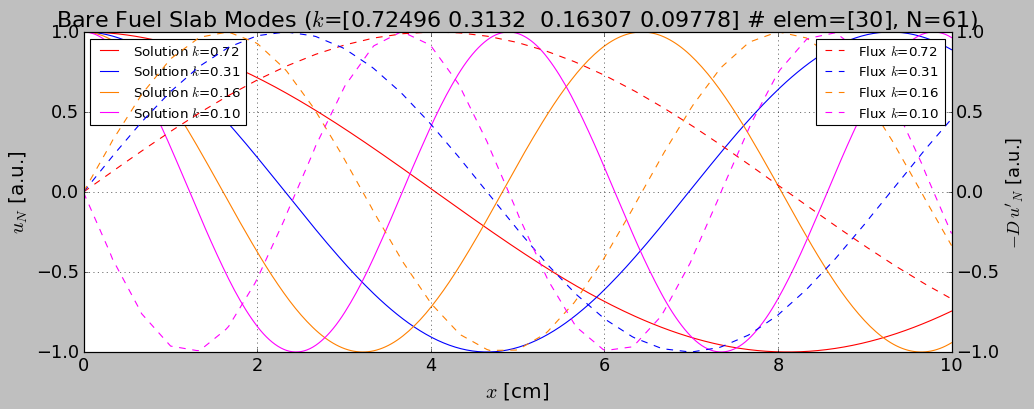

In [48]:
plot_modes(k_vec[1:5], eigen_vec[:,1:5])

### [Criticality](#toc)<a id="criticality-2"></a>
Use the adjusted $\Sigma_{fc}$ to verify the solution is critical.

#### [Data](#toc)<a id="datac-2"></a>

Solve problem with the modified parameter:

> + $\Sigma_{fc}$

*Assume all other parameters to remain the same.* This assumption is unlikely to hold because $D$ will likely change and an iterative process must be used even for this simple problem.


In [49]:
'''Sigma_f critical'''

sigma_f_fuel_critical = sigma_f_fuel / k_vec[0]
print('Sigma_f critical = %2.4e [1/cm]'%(sigma_f_fuel_critical*unit.cm))

Sigma_f critical = 5.8220e-02 [1/cm]


#### [Results](#toc)<a id="resultsc-2"></a>

Multiplication factor of the critical solution with adjusted $\Sigma_f$.

In [50]:
'''Critical Eigenvalues'''
k_vec = nu*sigma_f_fuel_critical/(lambda_vec+sigma_a_fuel)
import numpy as np
np.set_printoptions(precision=5)
print('k = ',k_vec[:5])

k =  [1.      0.42207 0.18234 0.09494 0.05693]


In [51]:
'''Probability of non-leakage does not change'''
p_nl = sigma_a_fuel / (lambda_vec[0] + sigma_a_fuel)
print('P_NL = ', p_nl)

P_NL =  0.8462885315606892
